<a href="https://colab.research.google.com/github/andreviniciusmb/ia_ic/blob/main/Regressao_IC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício 2 - IC
Com a variável Idade temos um erro médio absoluto é de 1311,16 e o objetivo é escolher 2 outras variáveis e compará-las isoladamente e depois combinar duas características para depois analisar o resultado.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.datasets import load_diabetes

In [ ]:
# Load the diabetes dataset
diabetes = load_diabetes()


print (diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [ ]:
tabela = pd.DataFrame(diabetes.data)
tabela.columns = diabetes.feature_names

# e a progressao da doenca
tabela['y'] = diabetes.target

tabela.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


### 1° modelo - Variável BMI  (Índice de Massa Corporal)

In [ ]:
#Para criar o modelo irei usar todos os dados, exceto os últimos 20 registros, da coluna bmi (Índice de Massa Corporal)
X = tabela['bmi']
X_treinamento = X[:-20].array.to_numpy().reshape(-1,1)
#Para validar o modelo, usei os 20 últimos registros
X_teste = X[-20:].array.to_numpy().reshape(-1,1)

y = tabela['y']
#mesma coisa aqui, porém, para o target (coluna y)
y_treinamento = y[:-20]
y_teste = y[-20:].array.to_numpy().reshape(-1,1)

#cria o modelo de regressão linear
regr = linear_model.LinearRegression()

# treina o modelo com os dados treinamento
regr.fit(X_treinamento, y_treinamento)

#coeficientes b1
print('Coeficiente b1: \n', regr.coef_)
#intercepto b0
print('Coeficiente b0: \n', regr.intercept_)

Coeficiente b1: 
 [938.23786125]
Coeficiente b0: 
 152.91886182616167


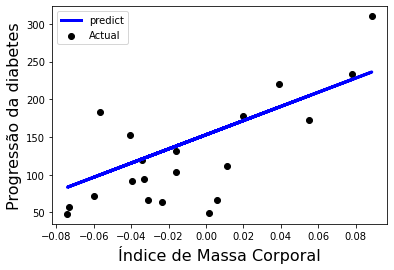

In [ ]:
# Predição/validação
diabetes_y_pred = regr.predict(X_teste)
#plota os dados reais
plt.scatter(X_teste,y_teste,  color='black',label='Actual')
# plota os dados preditos
plt.plot(X_teste, diabetes_y_pred, color='blue', linewidth=3,label='predict')

plt.legend()
plt.xlabel("Índice de Massa Corporal", size = 16)
plt.ylabel("Progressão da diabetes", size = 16)
plt.show()

In [ ]:
print('Erro Médio Absoluto (MAE): ', sum(abs(y_teste-diabetes_y_pred.reshape(-1,1))))

## O MSE torna menos tolerante a outliers, pSenalizando mais os outliers
print('Erro Médio Quadrado (MSE): ', sum((y_teste-diabetes_y_pred.reshape(-1,1))**2)/len(y_teste))

Erro Médio Absoluto (MAE):  [824.5418258]
Erro Médio Quadrado (MSE):  [2548.07239873]


### 2° modelo - Variável S4

In [ ]:
#Para criar o modelo irei usar todos os dados, exceto os últimos 20 registros, da coluna s4
X = tabela['s4']
X_treinamento = X[:-20].array.to_numpy().reshape(-1,1)
#Para validar o modelo, usei os 20 últimos registros
X_teste = X[-20:].array.to_numpy().reshape(-1,1)

y = tabela['y']
#mesma coisa aqui, porém, para o target (coluna y)
y_treinamento = y[:-20]
y_teste = y[-20:].array.to_numpy().reshape(-1,1)

#cria o modelo de regressão linear
regr = linear_model.LinearRegression()

# treina o modelo com os dados treinamento
regr.fit(X_treinamento, y_treinamento)

#coeficientes b1
print('Coeficiente b1: \n', regr.coef_)
#intercepto b0
print('Coeficiente b0: \n', regr.intercept_)

Coeficiente b1: 
 [701.12961061]
Coeficiente b0: 
 153.29420090748866


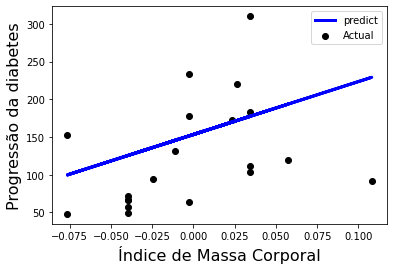

In [ ]:
# Predição/validação
diabetes_y_pred = regr.predict(X_teste)
#plota os dados reais
plt.scatter(X_teste,y_teste,  color='black',label='Actual')
# plota os dados preditos
plt.plot(X_teste, diabetes_y_pred, color='blue', linewidth=3,label='predict')

plt.legend()
plt.xlabel("Índice de Massa Corporal", size = 16)
plt.ylabel("Progressão da diabetes", size = 16)
plt.show()

In [ ]:
print('Erro Médio Absoluto (MAE): ', sum(abs(y_teste-diabetes_y_pred.reshape(-1,1))))

## O MSE torna menos tolerante a outliers, penalizando mais os outliers
print('Erro Médio Quadrado (MSE): ', sum((y_teste-diabetes_y_pred.reshape(-1,1))**2)/len(y_teste))

Erro Médio Absoluto (MAE):  [1213.26319528]
Erro Médio Quadrado (MSE):  [4850.82445883]


### 3° modelo - Combinando as 2 variáveis (BMI e S4)

In [ ]:
#Para criar o modelo irei usar todos os dados, exceto os últimos 20 registros, da coluna bmi (Índice de Massa Corporal)
X = tabela[['bmi','s4']]
X_treinamento = X[:-20]
#Para validar o modelo, usei os 20 últimos registros
X_teste = X[-20:]

y = tabela['y']
#mesma coisa aqui, porém, para o target (coluna y)
y_treinamento = y[:-20]
y_teste = y[-20:].array.to_numpy().reshape(-1,1)

#cria o modelo de regressão linear
regr = linear_model.LinearRegression()

# treina o modelo com os dados treinamento
regr.fit(X_treinamento, y_treinamento)

#coeficientes b1
print('Coeficiente b1: \n', regr.coef_)
#intercepto b0
print('Coeficiente b0: \n', regr.intercept_)

Coeficiente b1: 
 [781.12159381 374.43269761]
Coeficiente b0: 
 152.9566566760398


In [ ]:
# Predição/validação
diabetes_y_pred = regr.predict(X_teste)

# Exibe os coeficientes de cada variável
tabela_coef = pd.DataFrame()
tabela_coef['Variáveis'] = X_teste.columns
tabela_coef['Coef'] = regr.coef_
tabela_coef

,Variáveis,Coef
0,bmi,781.121594
1,s4,374.432698


In [ ]:
y = 781.12*0.061 + 374.43*(-0.002)
print('Valor Predito 0: ',y)

y = 781.12*(-0.05)  + 374.43*(-0.039)
print('Valor Predito 1: ',y)

y = 781.12*(0.044)  + 374.43*(-0.002)
print('Valor Predito 2: ',y)

tabela[['bmi','s4','y']].head(3)

Valor Predito 0:  46.89946
Valor Predito 1:  -53.658770000000004
Valor Predito 2:  33.620419999999996


,bmi,s4,y
0,0.061696,-0.002592,151.0
1,-0.051474,-0.039493,75.0
2,0.044451,-0.002592,141.0


In [ ]:
print('Erro Médio Absoluto (MAE): ', sum(abs(y_teste-diabetes_y_pred.reshape(-1,1))))

## O MSE torna menos tolerante a outliers, penalizando mais os outliers
print('Erro Médio Quadrado (MSE): ', sum((y_teste-diabetes_y_pred.reshape(-1,1))**2)/len(y_teste))

Erro Médio Absoluto (MAE):  [870.72822251]
Erro Médio Quadrado (MSE):  [2520.6592083]
